In [1]:
# import the urllib library
import urllib.request
from datetime import date
import numpy as np
import matplotlib.pyplot as plt 
from GHCND import *

In [2]:
ghn = GHNCD()
ghn.readCountriesFile()
ghn.readStationsFile()

Read 219 countries and codes
Read 991 stations with justGSN


In [11]:

# Get list of station names
station_names = ghn.getStatKeyNames()

# get url for a given station index
whichStat1 = 9
fileName = station_names[whichStat1]+'.dly'
urlName = 'http://www.hep.ucl.ac.uk/undergrad/0056/other/projects/ghcnd/ghcnd_gsn/' + fileName

# copy station data from remote to local
destination = f"data/{fileName}"
urllib.request.urlretrieve(urlName, destination)
statDict1 = ghn.processFile(destination)
print(ghn.getStation(station_names[whichStat1]))


AO000066160 is LUANDA, Angola at -8.85 13.233 74.0


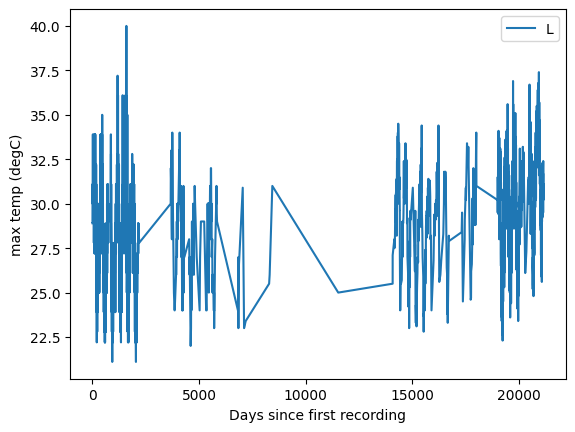

In [12]:
var1 = Variable(ghn.getVar(statDict1, 'TMAX'), "max temp (degC)", ghn.stationDict[station_names[whichStat1]].name)
var1.convert_time()

fig, ax = plt.subplots()
ax.plot(var1.get_dates(), var1.get_vals())
ax.set_xlabel("Days since first recording")
ax.set_ylabel(f"{var1.get_label()}")
ax.legend((var1.get_station()))


### Find station with the least number of gaps in max_temp data

In [14]:
# get list of station names
station_names = ghn.getStatKeyNames()

# count number of gaps in each station
counts = {}
for station in station_names:
    try:
        # get url for a given station index
        fileName = f"{station}.dly"
        urlName = 'http://www.hep.ucl.ac.uk/undergrad/0056/other/projects/ghcnd/ghcnd_gsn/' + fileName

        # copy station data from remote to local
        destination = f"data/{fileName}"
        urllib.request.urlretrieve(urlName, destination)
        statDict = ghn.processFile(destination)
        print(ghn.getStation(station))

        var = Variable(ghn.getVar(statDict, 'TMAX'), "max temp (degC)", ghn.stationDict[station].name)
        var.convert_time()
        count = var.count_gaps()
        counts[station] = count
    except Exception:
        print(f"Gaps couldn't be counted for station {station}")
        continue

print(counts)

AE000041196 is SHARJAH INTER. AIRP, United Arab Emirates at 25.333 55.517 34.0
AF000040930 is NORTH-SALANG, Afghanista at 35.317 69.017 3366.0
AG000060390 is ALGER-DAR EL BEIDA, Algeria at 36.7167 3.25 24.0
AG000060590 is EL-GOLEA, Algeria at 30.5667 2.8667 397.0
AG000060611 is IN-AMENAS, Algeria at 28.05 9.6331 561.0
AG000060680 is TAMANRASSET, Algeria at 22.8 5.4331 1362.0
AJ000037989 is ASTARA, Azerbaijan at 38.5 48.9 -22.0
ALM00013615 is TIRANA RINAS, Albani at 41.415 19.721 38.4
AM000037781 is ARAGAC VISOKOGORNAYA, Armenia at 40.5 44.2 3223.0
AO000066160 is LUANDA, Angola at -8.85 13.233 74.0
AO000066270 is WAKU KUNGU (CELA), Angola at -11.417 15.117 1304.0
AO000066390 is LUBANGO (SA DA BAND, Angola at -14.933 13.567 1761.0
AO000066410 is MENONGUE (SERPA PIN, Angola at -14.65 17.683 1343.0
AO000066422 is MOCAMEDES, Angola at -15.2 12.15 45.0
AO000066447 is MAVINGA, Angola at -15.833 20.35 1088.0
AQW00061705 is PAGO PAGO WSO AP, American Samoa [United States] at -14.3306 -170.7136 

In [19]:
import json

with open("stat_counts_tmax.txt", "a") as f:
    json.dump(counts, f, indent=2)